In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
companies = pd.read_csv("Unicorn_Companies.csv")

In [3]:
companies.shape

(1037, 13)

In [4]:
companies.drop_duplicates().shape

(1037, 13)

In [5]:
companies.dtypes

,0
Company,object
Valuation ($B),object
Date Joined,object
Country,object
City,object
Industry,object
Select Inverstors,object
Founded Year,float64
Total Raised,object
Financial Stage,object


In [11]:
companies.sort_values(by="Founded Year", ascending=False).head(10)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
712,Jokr,$1.2,12/2/2021,United States,New York,E-commerce & direct-to-consumer,"GGV Capital, Tiger Global Management, Greycroft",2021.0,$430M,NaN,15.0,1.0,NaN
987,Mensa Brands,$1,11/16/2021,India,Bengaluru,Other,"Accel, Falcon Edge Capital, Norwest Venture Pa...",2021.0,$228.58M,NaN,13.0,3.0,NaN
716,Phantom,$1.2,1/31/2022,United States,San Francisco,Fintech,"Paradigm, Andreessen Horowitz, Jump Capital",2021.0,$118.5M,NaN,9.0,1.0,NaN
561,candy.com,$1.5,10/21/2021,United States,New York,Fintech,"Insight Partners, Softbank Group, Connect Vent...",2021.0,$100M,NaN,9.0,1.0,NaN
300,Flink,$2.85,12/1/2021,Germany,Berlin,E-commerce & direct-to-consumer,"Mubadala Capital, Bond, Prosus Ventures",2021.0,$1.042B,NaN,10.0,1.0,NaN
599,Yidian Zixun,$1.4,10/17/2017,China,Beijing,Mobile & telecommunications,"Phoenix New Media, Tianjin Haihe Industry Fund",2021.0,$15M,NaN,2.0,NaN,NaN
766,GlobalBees,$1.1,12/28/2021,India,New Delhi,E-commerce & direct-to-consumer,"Chiratae Ventures, SoftBank Group, Trifecta Ca...",2021.0,$291.5M,NaN,8.0,1.0,NaN
443,ClickHouse,$2,10/28/2021,United States,Portola Valley,Data management & analytics,"Lightspeed Venture Partners, Almaz Capital Par...",2021.0,$300M,NaN,11.0,1.0,NaN
989,PLACE,$1,11/17/2021,United States,Bellingham,Internet software & services,"Goldman Sachs Asset Management, 3L",2020.0,$100M,NaN,2.0,1.0,NaN
933,Pantheon Systems,$1,7/13/2021,United States,San Francisco,Internet software & services,"Foundry Group, Scale Venture Partners, SoftBan...",2020.0,$150K,NaN,1.0,NaN,NaN


In [15]:
companies["Founded Year"].value_counts().sort_values(ascending=False)

,count
Founded Year,
2015.0,144
2014.0,105
2016.0,101
2012.0,87
2013.0,85
2011.0,76
2017.0,67
2018.0,55
2010.0,37


Text(0.5, 1.0, 'Founded Year histogram')

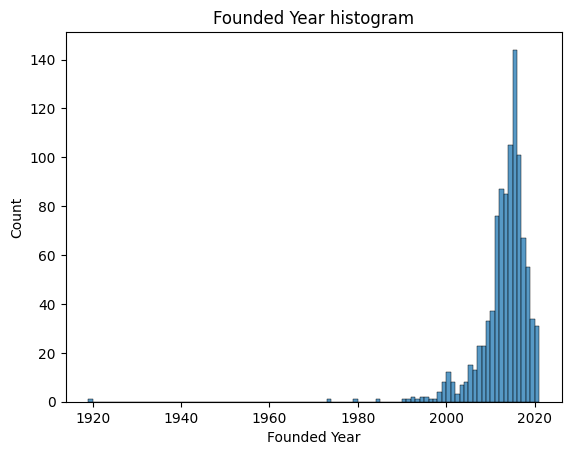

In [18]:
sns.histplot(data=companies, x='Founded Year')
plt.title('Founded Year histogram')

In [19]:
companies["Date Joined"] = pd.to_datetime(companies["Date Joined"])
companies.dtypes

,0
Company,object
Valuation ($B),object
Date Joined,datetime64[ns]
Country,object
City,object
Industry,object
Select Inverstors,object
Founded Year,float64
Total Raised,object
Financial Stage,object


In [20]:
companies["Month Joined"] = companies["Date Joined"].dt.month_name()
companies.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Month Joined
0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0,April
1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,NaN,29.0,12.0,NaN,December
2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0,January
3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,Acquired,56.0,13.0,1.0,December
4,Epic Games,$42,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,Acquired,25.0,5.0,2.0,October


In [27]:
companies["Years To Join"] = companies["Date Joined"].dt.year - companies["Founded Year"]
companies.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Month Joined,Years To Join
0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0,April,5.0
1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,NaN,29.0,12.0,NaN,December,10.0
2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0,January,4.0
3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,Acquired,56.0,13.0,1.0,December,6.0
4,Epic Games,$42,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,Acquired,25.0,5.0,2.0,October,27.0


In [28]:
companies_2021 = companies[companies["Date Joined"].dt.year == 2021]
companies_2021.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Month Joined,Years To Join
10,FTX,$32,2021-07-20,Bahamas,Fintech,"Sequoia Capital, Thoma Bravo, Softbank",NaN,2018.0,$1.829B,Acq,40.0,3.0,1.0,July,3.0
15,J&T Express,$20,2021-04-07,Indonesia,Jakarta,"Supply chain, logistics, & delivery","Hillhouse Capital Management, Boyu Capital, Se...",2015.0,$4.653B,NaN,9.0,3.0,NaN,April,6.0
24,OpenSea,$13.3,2021-07-20,United States,New York,E-commerce & direct-to-consumer,"Andreessen Horowitz, Thirty Five Ventures, Sou...",2017.0,$425.12M,NaN,26.0,2.0,NaN,July,4.0
32,GoodLeap,$12,2021-10-13,United States,Roseville,Internet software & services,"New Enterprise Associates, BDT Capital Partner...",2003.0,$1.8B,NaN,8.0,1.0,NaN,October,18.0
34,ZongMu Technology,$11.4,2021-06-03,China,Shanghai,Auto & transportation,"LTW Capital, Legend Capital, Qualcomm Ventures",2013.0,$210.83M,NaN,19.0,2.0,NaN,June,8.0


In [29]:
companies_2021.insert(3, "Week Joined", companies_2021["Date Joined"].dt.strftime('%Y-W%V'), True)

companies_by_week_2021 = companies_2021.groupby(by="Week Joined")["Company"].count().reset_index().rename(columns={"Company":"Company Count"})

companies_by_week_2021.head()

,Week Joined,Company Count
0,2021-W01,12
1,2021-W02,9
2,2021-W03,5
3,2021-W04,8
4,2021-W05,4


In [32]:
companies_2020 = companies[companies["Date Joined"].dt.year == 2020]

companies_2020_2021 = pd.concat([companies_2020, companies_2021.drop(columns="Week Joined")])

companies_2020_2021["Quarter Joined"] = companies_2020_2021["Date Joined"].dt.to_period('Q').dt.strftime('%Y-Q%q')


if 'Valuation ($B)' in companies_2020_2021.columns:

    companies_2020_2021 = companies_2020_2021.rename(columns={'Valuation ($B)': 'Valuation'})
    companies_2020_2021["Valuation"] = companies_2020_2021["Valuation"].str.strip("$B").astype(float)
else:

    print("Column 'Valuation' or 'Valuation ($B)' not found in the DataFrame.")


companies_by_quarter_2020_2021 = companies_2020_2021.groupby(by="Quarter Joined")["Valuation"].mean().reset_index().rename(columns={"Valuation":"Average Valuation"})

companies_by_quarter_2020_2021.head()

,Quarter Joined,Average Valuation
0,2020-Q1,3.607647
1,2020-Q2,3.431111
2,2020-Q3,3.817241
3,2020-Q4,3.710000
4,2021-Q1,2.542952


In [33]:
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November",
               "December"]
print(month_order)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


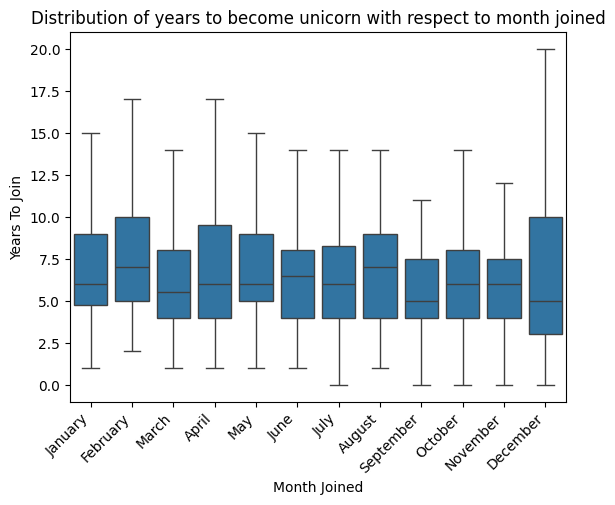

In [34]:
sns.boxplot(x=companies['Month Joined'],
            y=companies['Years To Join'],
            order=month_order,
            showfliers=False)
plt.title('Distribution of years to become unicorn with respect to month joined')


plt.xticks(rotation=45, horizontalalignment='right')


plt.show()

<ipython-input-36-08763ef7ca5f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x=companies["Founded Year"], y=companies["Years To Join"], ci=False)


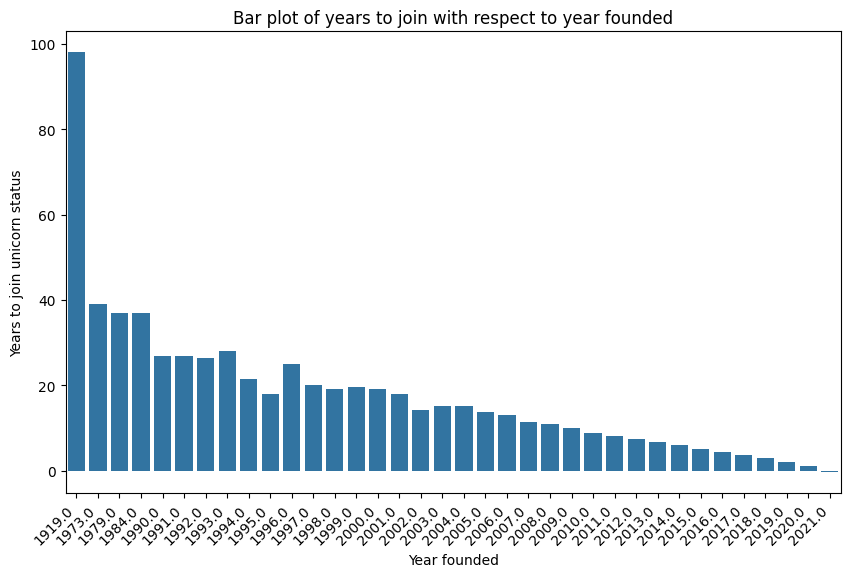

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x=companies["Founded Year"], y=companies["Years To Join"], ci=False)
plt.title("Bar plot of years to join with respect to year founded")
plt.xlabel("Year founded")
plt.ylabel("Years to join unicorn status")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

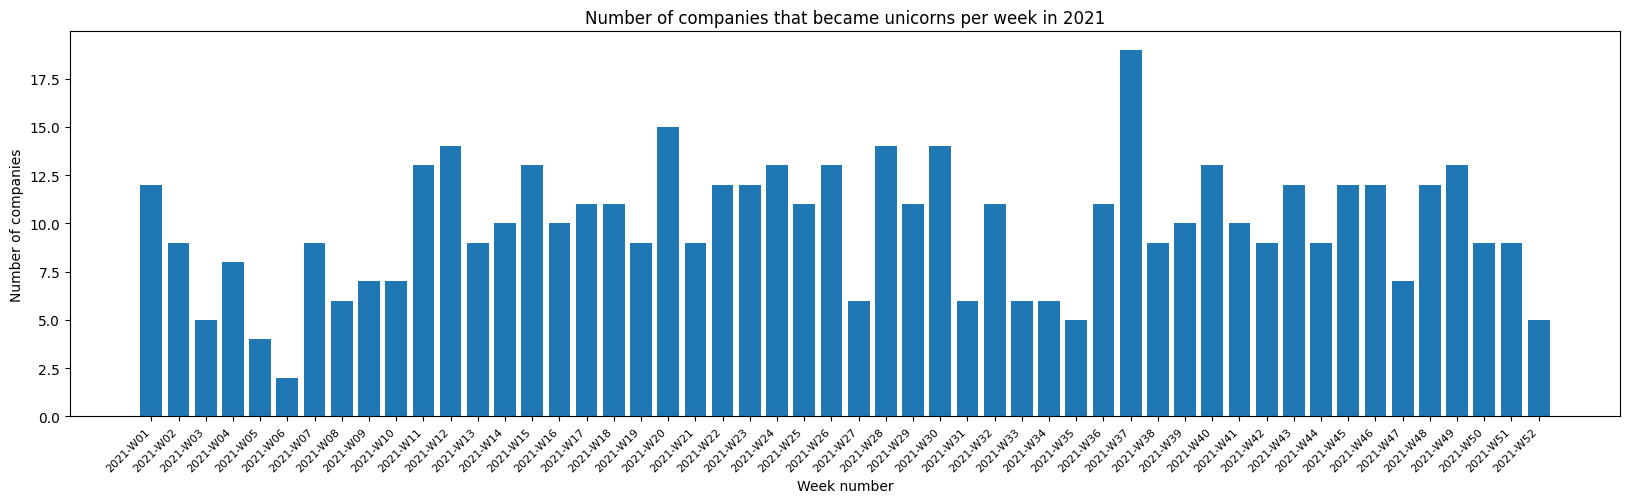

In [37]:
plt.figure(figsize = (20, 5))
plt.bar(x=companies_by_week_2021['Week Joined'],height=companies_by_week_2021['Company Count'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of companies")

plt.title("Number of companies that became unicorns per week in 2021")
plt.xticks(rotation = 45, horizontalalignment='right', fontsize=8)
plt.show()

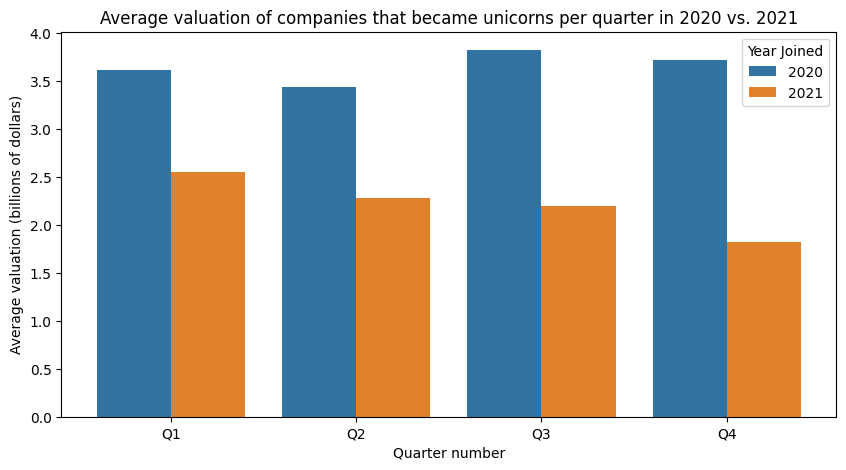

In [38]:
companies_by_quarter_2020_2021['Quarter Number'] = companies_by_quarter_2020_2021['Quarter Joined'].str[-2:]
companies_by_quarter_2020_2021['Year Joined'] = companies_by_quarter_2020_2021['Quarter Joined'].str[:4]
plt.figure(figsize = (10, 5))
sns.barplot(x=companies_by_quarter_2020_2021['Quarter Number'],
            y=companies_by_quarter_2020_2021['Average Valuation'],
            hue=companies_by_quarter_2020_2021['Year Joined'])
plt.plot()
plt.xlabel("Quarter number")
plt.ylabel("Average valuation (billions of dollars)")
plt.title("Average valuation of companies that became unicorns per quarter in 2020 vs. 2021")
plt.show()